## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [17]:
%matplotlib inline

import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [19]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [20]:
#answer below:
absent_ = pd.get_dummies(absent, columns=[
    'Seasons',
    'Education',
    'Social drinker',
    'Disciplinary failure',
    
], drop_first=True)


In [21]:
absent_.drop(['ID'], axis=1, inplace=True)
absent_.drop(['Son'], axis=1, inplace=True)
absent_.drop(['Pet'], axis=1, inplace=True)
absent_.drop(['Day of the week'], axis=1, inplace=True)
absent_.drop(['Reason for absence'], axis=1, inplace=True)
absent_.drop(['Social smoker'], axis=1, inplace=True)
absent_.drop(['Body mass index'], axis=1, inplace=True)

In [22]:
X = absent_.drop('Absenteeism time in hours', axis=1)
y = absent_['Absenteeism time in hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

Scale the independent variables using the standard scaler

In [24]:
# answer below:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_features = ['Height', 'Weight', 'Hit target', 'Age', 'Service time', 'Distance from Residence to Work', 'Transportation expense', 'Month of absence']
scaler = StandardScaler()

preprocessor = ColumnTransformer(transformers=[('num', scaler, num_features)])

X_train_ = preprocessor.fit_transform(X_train)
X_test_ = preprocessor.transform(X_test)

Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [25]:
# answer below:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='linear', C=1000, epsilon=0.01, gamma='auto')
svr_rbf.fit(X_train_, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
print(svr_rbf.score(X_train_, y_train))
print(svr_rbf.score(X_test_, y_test))

-0.05340392133992666
-0.030637933740691015


If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [27]:
# answer below:
from sklearn.model_selection import GridSearchCV
param = {'C': [0.1, 10, 100], 'kernel': ('rbf', 'linear'), 'epsilon': [1, 5, 10], 'gamma': [0.01, 1, 10]}
svr = SVR()
grid = GridSearchCV(estimator=svr, param_grid=param, cv=5, verbose=1, scoring='mean_squared_error')
grid.fit(X_train_, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    7.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10, 100], 'epsilon': [1, 5, 10],
                         'gamma': [0.01, 1, 10], 'kernel': ('rbf', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [28]:
grid.best_params_

{'C': 10, 'epsilon': 5, 'gamma': 1, 'kernel': 'rbf'}

In [29]:
best_svr = SVR(kernel='rbf', C=10, epsilon=5, gamma=1)
best_svr.fit(X_train_, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=5, gamma=1, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
print(best_svr.score(X_train_, y_train))
print(best_svr.score(X_test_, y_test))

0.1426500337144182
0.0010265581938898594


Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

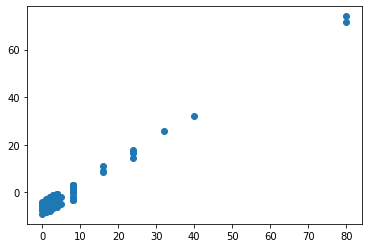

In [50]:
# answer below:
predict_y = best_svr.predict(X_test_)
residual = y_test - predict_y

plt.scatter(y_test, residual)
plt.show()

In [49]:
#It seems that model is off, despite the gridsearch. Here is why
y.value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeism time in hours, dtype: int64

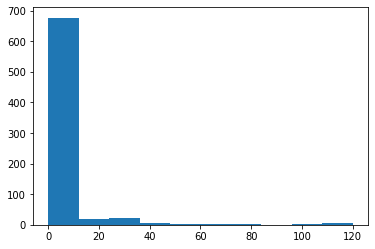

In [48]:
plt.hist(y)
plt.show()
#basically we do not have a enough variance in our data to conduct a meaningful anaylsis. 